# The 00's chart

This notebook is dedicated to the 00's decade chart.

In [1]:
import pandas as pd
import re
import numpy as np
import operator
from similarity.levenshtein import Levenshtein
levenshtein = Levenshtein()

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistic test
import scipy.stats as st

## Original Chart

The 90's have had a decade chart conducted in 2009, and it cosisted 100 songs as well. Let's have a look at it right now.

In [2]:
thousands_original_df = pd.read_csv("DFs/original_thousands_decade_chart.csv")

In [3]:
print(thousands_original_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
location                    100 non-null int64
name                        100 non-null object
artist                      100 non-null object
spotify_popularity          100 non-null int64
spotify_valence             100 non-null float64
spotify_tempo               100 non-null float64
spotify_instrumentalness    100 non-null float64
spotify_year                100 non-null int64
wikipedia_year              100 non-null int64
genres                      100 non-null object
views                       100 non-null int64
yearly_position             100 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 8.3+ KB
None


In [4]:
years = []
years_source = []
for row in thousands_original_df.iterrows():
    if int(row[1]['wikipedia_year']) > 1999 and int(row[1]['wikipedia_year']) < 2010:
        years.append(row[1]['wikipedia_year'])
        years_source.append('Wikipedia')
    elif int(row[1]['spotify_year']) > 1999 and int(row[1]['spotify_year']) < 2010:
        years.append(row[1]['spotify_year'])
        years_source.append('Spotify')
    elif int(row[1]['spotify_year']) <= 1999 and int(row[1]['spotify_year']) <= 1999:
        years.append(1999)
        years_source.append('Est')
    elif int(row[1]['spotify_year']) >= 2010 and int(row[1]['spotify_year']) >= 2010:
        years.append(2010)
        years_source.append('Est')
    else:
        years.append(int(input(thousands_original_df.name+thousands_original_df.artist)))
        years_source.append('Manual')
thousands_original_df['year'] = years
thousands_original_df['year_source'] = years_source

In [5]:
yearly_charts = pd.read_csv("DFs/Thousands.csv")
top_yearly = yearly_charts.loc[yearly_charts["Location"] == 1]
#top_yearly = top_yearly.drop(columns = '1990')
levenshtein = Levenshtein()
original_locations = []
for yearly_song in top_yearly.iterrows():
    found_song = 0
    for original_song in thousands_original_df.iterrows():
        if levenshtein.distance(yearly_song[1]['Song'], original_song[1]['name']) <= 1:
            original_locations.append(original_song[1]['location'])
            found_song = 1
    if found_song == 0:
        original_locations.append(0)
top_yearly['original_decade_location'] = original_locations
display(top_yearly)

c:\users\tomha\pycharmprojects\glglzpredictor\venv\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Year,Location,Artist,Song,original_decade_location
0,"1. ""Stan"" – אמינם עם דיידו",2000,1,Eminem,Stan,14
20,"1. ""Can't Get You Out of My Head"" – קיילי מינוג",2001,1,Kylie Minogue,Can't Get You Out of My Head,46
40,"1. ""All The Things She Said"" – ט.א.ט.ו.",2002,1,t.A.T.u.,All The Things She Said,53
70,"1. ""White Flag"" – דיידו",2003,1,Dido,White Flag,0
100,"1. ""My Immortal"" – אוונסנס",2004,1,Evanescence,My Immortal,3
130,"1. ""You're Beautiful"" – ג'יימס בלאנט",2005,1,James Blunt,You're Beautiful,10
160,"1. ""Because Of You"" – קלי קלארקסון",2006,1,Kelly Clarkson,Because Of You,11
190,"1. ""Umbrella"" – ריהאנה עם ג'יי זי",2007,1,Rihanna,Umbrella,41
230,"1. ""I Kissed A Girl"" – קייטי פרי",2008,1,Katy Perry,I Kissed A Girl,0
270,"1. ""I Gotta Feeling"" – ‏The Black Eyed Peas",2009,1,Black Eyed Peas,I Gotta Feeling,19


Once again we are seeing no distinct connection between the yearly charts and the decade chart. Two of the No. 1 songs in the yearly charts didn't even make it to the original decade chart.

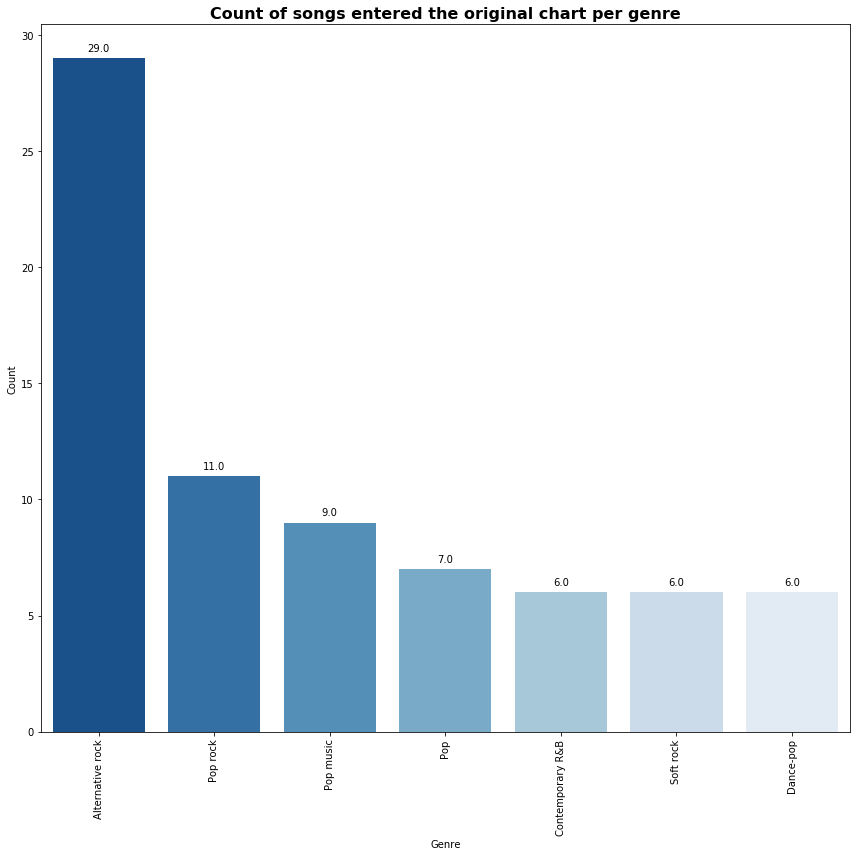

In [6]:
genres_dict = {}
for song_genre in thousands_original_df['genres']:
    for genre in song_genre.split(","):
        if len(re.findall(r"'([^']*)'", genre))>0:
            if re.findall(r"'([^']*)'", genre)[0] in genres_dict.keys():
                genres_dict[re.findall(r"'([^']*)'", genre)[0]] = genres_dict[re.findall(r"'([^']*)'", genre)[0]] + 1
            else:
                genres_dict[re.findall(r"'([^']*)'", genre)[0]] = 1
newDict = dict(filter(lambda elem: elem[1] > 5,genres_dict.items()))
order_key = sorted(newDict.items(), key=operator.itemgetter(1), reverse = True)
keys = []
for key in order_key:
    keys.append(key[0])
plt.figure(figsize=(12,12))
ax = sns.barplot(x=list(newDict.keys()), y=np.array(list(newDict.values())).astype(float), order = keys,
                palette = "Blues_r")
ax.set_title("Count of songs entered the original chart per genre", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="Genre", ylabel='Count')
for item in ax.get_xticklabels(): item.set_rotation(90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:,}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

In a somewhat surprising manner, we see that the most popular genre of this chart is Alternative Rock. Combining "Pop" and "Pop music" together gets us to twelve songs which puts pop in second place, right before 'Pop Rock' with eleven.

In [7]:
grouped_by_year = thousands_original_df.groupby('year')
year_df = []
for group in grouped_by_year:
    year = {}
    year['name'] = group[0]
    year['count_songs'] = group[1]['name'].count()
    year['avg_song_pop'] = group[1]['spotify_popularity'].mean()
    year['avg_views'] = group[1]['views'].mean()
    year['avg_chart_location'] = group[1]['location'].mean()
    year['yearly_entrances_percentage'] = group[1].loc[group[1]['yearly_position'] > 0]['yearly_position'].count() / group[1]['name'].count() 
    year['average_yearly_position'] = group[1].loc[group[1]['yearly_position'] > 0]['yearly_position'].mean()
    year['avg_valence'] = group[1]['spotify_valence'].mean()
    genres = {}
    for song in group[1]['genres']:
        for song_genre in song.split(","):
            if len(re.findall(r"'([^']*)'", song_genre))>0:
                if re.findall(r"'([^']*)'", song_genre)[0] not in genres.keys():
                    genres[re.findall(r"'([^']*)'", song_genre)[0]] = 1
                else:
                    genres[re.findall(r"'([^']*)'", song_genre)[0]] += 1
    year['popular_genre'] = max(genres.items(), key=operator.itemgetter(1))[0]
    year_df.append(year)
year_df= pd.DataFrame(year_df)
display(year_df)

,name,count_songs,avg_song_pop,avg_views,avg_chart_location,yearly_entrances_percentage,average_yearly_position,avg_valence,popular_genre
0,1999,3,60.000000,29402.666667,87.000000,0.333333,19.000000,0.494667,Dance-pop
1,2000,19,69.157895,106269.631579,42.157895,0.526316,8.900000,0.507368,Alternative rock
2,2001,11,66.000000,57228.545455,53.818182,0.727273,7.625000,0.480364,Alternative rock
3,2002,15,73.066667,75869.400000,46.666667,0.600000,10.444444,0.408040,Alternative rock
4,2003,12,72.166667,112129.666667,41.250000,0.916667,9.909091,0.430708,Alternative rock
5,2004,5,76.600000,85524.800000,66.400000,1.000000,6.400000,0.702800,Alternative rock
6,2005,10,76.700000,56462.100000,47.800000,0.900000,8.111111,0.336000,Alternative rock
7,2006,8,72.500000,74935.750000,52.000000,0.875000,6.285714,0.450750,Soul music
8,2007,2,71.000000,106625.500000,34.500000,1.000000,3.000000,0.588000,Pop
9,2008,4,79.250000,114051.500000,57.000000,1.000000,5.500000,0.658250,Baroque pop


We do see a shift in genres here. The most popular genre of the first five years of the decade is alternative rock. Since then, we see that Pop music takes control. We also see an ascend in the average song popularity as the decade goes, while there is a distinct descent in the number of songs entering the chart. 

Another interesting trend lies in "yearly_entrances_percentage". This field represents how many of the songs in the original decade chart have entered their yearly chart. We see that as the decade proceeds, these charts are becoming correlated.

## Renewed Chart

In [8]:
thousands_df = pd.read_csv("DFs/united_thousands.csv")
print(thousands_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 23 columns):
name                   497 non-null object
version_exists         497 non-null int64
artist                 497 non-null object
artist_first_letter    497 non-null object
year                   497 non-null int64
year_source            497 non-null object
song_popularity        497 non-null int64
artist_popularity      497 non-null int64
duration_ms            497 non-null int64
key                    497 non-null int64
time_signature         497 non-null int64
acousticness           497 non-null float64
danceability           497 non-null float64
energy                 497 non-null float64
instrumentalness       497 non-null float64
loudness               497 non-null float64
speechiness            497 non-null float64
valence                497 non-null float64
tempo                  497 non-null float64
genres                 497 non-null object
views                  497 non-nul

In [9]:
renewed_top_100 = thousands_df.loc[thousands_df['new_chart_location'] < 101]
chart_comparison_table = {}
chart_comparison_table['Chart_name'] = ['Original Chart', 'Renewed Chart']
chart_comparison_table['Count_songs'] = [thousands_original_df['name'].count(), renewed_top_100['name'].count()]
chart_comparison_table['Average Spotify Popularity'] = [thousands_original_df['spotify_popularity'].mean(), renewed_top_100['song_popularity'].mean()]
chart_comparison_table['Average Valence'] = [thousands_original_df['spotify_valence'].mean(), renewed_top_100['valence'].mean()]
chart_comparison_table['Average Tempo'] = [thousands_original_df['spotify_tempo'].mean(), renewed_top_100['tempo'].mean()]
chart_comparison_table['Average Instrumentalness'] = [thousands_original_df['spotify_instrumentalness'].mean(), renewed_top_100['instrumentalness'].mean()]
chart_comparison_table['Average Views'] = [thousands_original_df['views'].mean(), renewed_top_100['views'].mean()]
chart_comparison_table['Average Year'] = [thousands_original_df['year'].mean(), renewed_top_100['year'].mean()]
chart_comparison_table = pd.DataFrame(chart_comparison_table)
display(chart_comparison_table)

,Chart_name,Count_songs,Average Spotify Popularity,Average Valence,Average Tempo,Average Instrumentalness,Average Views,Average Year
0,Original Chart,100,70.17,0.472251,121.56117,0.033462,80493.18,2003.46
1,Renewed Chart,100,73.66,0.490119,119.85528,0.005314,82839.45,2004.51


Comparing these two charts, we can see that the songs in the new chart are more popular in Spotify. They are also slightly happier, and a lot less insturmental. There is also a big difference in the average year.

## Original Position

In [10]:
original_decade_position = []
for new_song in thousands_df.iterrows():
    found_song = 0
    for old_song in thousands_original_df.iterrows():
        if levenshtein.distance(new_song[1]['name'].split("_")[1], old_song[1]['name']) <=1 and found_song == 0:
            original_decade_position.append(old_song[1]["location"])
            found_song = 1
    if found_song == 0:
        original_decade_position.append(0)
thousands_df['original_decade_position'] = original_decade_position

In [11]:
for old_song in thousands_original_df.iterrows():
    found_song = 0
    for new_song in thousands_df.iterrows():
        if levenshtein.distance(new_song[1]['name'].split("_")[1], old_song[1]['name']) <=1 and found_song == 0:
            found_song = 1
    if found_song == 0:
        for new_song in thousands_df.iterrows():
            if levenshtein.distance(new_song[1]['name'].split("_")[1], old_song[1]['name']) <=5 and found_song == 0:
                print("Old Song = " +old_song[1]['name'])
                print("New Song = " +new_song[1]['name'].split("_")[1])
                user_confirm = input("Confirm?")
                if user_confirm == 'y' or user_confirm == "Y":
                    thousands_df.loc[thousands_df['name'] == new_song[1]['name'], ['original_decade_position']] = old_song[1]["location"]
                    found_song = 1
    if found_song == 0:
        print("Old Song = " +old_song[1]['name'])

Old Song = Mad World
New Song = One Word
Confirm?n
Old Song = Mad World
Old Song = American Pie
New Song = American Idiot
Confirm?n
Old Song = American Pie
New Song = American Boy
Confirm?n
Old Song = American Pie
New Song = America
Confirm?n
Old Song = American Pie
Old Song = Drops Of Jupiter (Tell Me)
Old Song = Can't Get You Out Of My Head
New Song = Can't Get You out of My Head
Confirm?y
Old Song = Crazy In Love
New Song = Not In Love
Confirm?n
Old Song = Crazy In Love
Old Song = Everybody's Gotta Learn Sometimes
New Song = Everybody's Got To Learn Sometime
Confirm?y
Old Song = Super Girl
New Song = Supergirl
Confirm?y
Old Song = Numb/Encore
New Song = Numb / Encore
Confirm?y
Old Song = A Little Respect
Old Song = Maria Maria
Old Song = Hips Don't Lie
New Song = Don't Lie
Confirm?n
Old Song = Hips Don't Lie


In [12]:
from pathlib import Path
p = Path('C:/Users/tomha/PycharmProjects/GlglzPredictor/DFs/')
thousands_df.to_csv(Path(p, 'thousands_updated.csv'), index=None, header=True)

In [13]:
thousands_df = pd.read_csv("DFs/thousands_updated.csv")
op_df = thousands_df.loc[thousands_df['original_decade_position'] == 0].loc[thousands_df['new_chart_location'] < 101]
print(op_df['name'].count())

48


That number represents hoy many songs appeared in the renewed chart and didn't appear in the original chart.

In [14]:
genres_dict = {}
for song_genre in op_df['genres']:
    for genre in song_genre.split(","):
        if len(re.findall(r"'([^']*)'", genre))>0:
            if re.findall(r"'([^']*)'", genre)[0] in genres_dict.keys():
                genres_dict[re.findall(r"'([^']*)'", genre)[0]] = genres_dict[re.findall(r"'([^']*)'", genre)[0]] + 1
            else:
                genres_dict[re.findall(r"'([^']*)'", genre)[0]] = 1
newDict = dict(filter(lambda elem: elem[1] > 5,genres_dict.items()))
display(op_df.sort_values(by=['new_chart_location']).head(1))
display(newDict)

,name,version_exists,artist,artist_first_letter,year,year_source,song_popularity,artist_popularity,duration_ms,key,...,instrumentalness,loudness,speechiness,valence,tempo,genres,views,old_chart_position,new_chart_location,original_decade_position
10,thousands_Crazy In Love (feat. Jay-Z),0,Beyoncé,B,2003,wikipedia,76,89,236133,2,...,0.0,-6.596,0.226,0.681,99.165,"['Hip hop ', 'Funk', 'Contemporary R&B']",117930,0,11,0


{'Contemporary R&B': 6, 'Pop ': 8, 'Pop rock': 8, 'Alternative rock': 10}

Out of the songs that didn't appear in the chart, 'Crazy In Love' is the most successful at the 17th place. The most popular genre of these songs is Alternative Rock.

## Version Exists

In [15]:
version_exists = thousands_df.groupby('version_exists')
exists_df = []
for group in version_exists:
    category = {}
    category['name'] = group[0]
    category['count_songs'] = group[1]['name'].count()
    category['avg_popularity'] = group[1]['song_popularity'].mean()
    category['avg_artist_popularty'] = group[1]['artist_popularity'].mean()
    category['count_wikipedia'] = group[1].loc[group[1]['views'] > 0]['views'].count()
    category['wikipedia_percentage'] = group[1].loc[group[1]['views'] > 0]['views'].count() /  group[1]['name'].count()
    category['avg_views'] = group[1].loc[group[1]['views'] > 0]['views'].mean()
    category['count_old_chart'] = group[1].loc[group[1]['old_chart_position'] > 0]['old_chart_position'].count()
    category['old_chart_percentage'] = group[1].loc[group[1]['old_chart_position'] > 0]['old_chart_position'].count() / group[1]['name'].count()
    category['avg_new_chart'] = group[1]['new_chart_location'].mean()
    category['count_new_chart'] = group[1].loc[group[1]['new_chart_location'] < 101]['new_chart_location'].count()
    category['new_chart_percentage'] = group[1].loc[group[1]['new_chart_location'] < 101]['new_chart_location'].count() / group[1]['name'].count()
    exists_df.append(category)
exists_df = pd.DataFrame(exists_df)
display(exists_df)

,name,count_songs,avg_popularity,avg_artist_popularty,count_wikipedia,wikipedia_percentage,avg_views,count_old_chart,old_chart_percentage,avg_new_chart,count_new_chart,new_chart_percentage
0,0,459,65.568627,74.851852,442,0.962963,43700.90724,203,0.442266,243.577342,96,0.209150
1,1,38,52.578947,65.315789,36,0.947368,36644.50000,8,0.210526,314.500000,4,0.105263


Unlike the other decade charts, this time only 38 songs had a reference to a versions - and these were overall less popular than the general population of songs.

## Artist

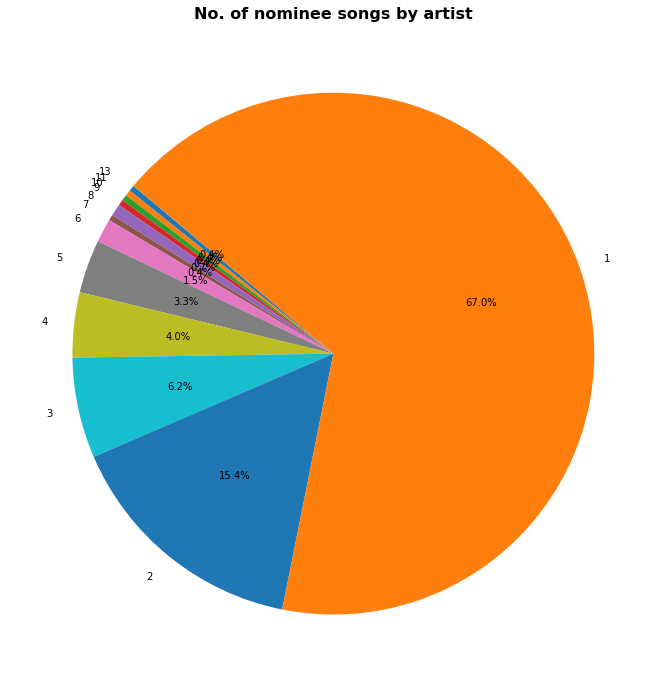

In [16]:
artist_value_counts = thousands_df.artist.value_counts()
artist_count = pd.DataFrame(columns = ['key', 'count'], dtype=int)
for orig_value in artist_value_counts:
    if orig_value in pd.Series(artist_count['count'].astype('int')):
        artist_count.loc[artist_count['key'] == orig_value, 'count'] = artist_count.at[orig_value, 'count']+1
    else:
        artist_count.loc[orig_value] = [orig_value, 1]
plt.figure(figsize=(12,12))
plt.pie(artist_count['count'], labels=artist_count['key'],
autopct='%1.1f%%', startangle=140)
plt.title("No. of nominee songs by artist", {'fontsize': 16,
 'fontweight' : 'bold',
 'verticalalignment': 'bottom', 'horizontalalignment': 'center'})
plt.show()

In [17]:
popular_artists_df = []
for index in thousands_df.artist.value_counts()[thousands_df.artist.value_counts() > 8].index:
    artist = {}
    artist['name'] = index
    artist['nominee_songs'] = thousands_df.artist.value_counts()[index]
    artist['entered_songs'] = thousands_df.loc[thousands_df['new_chart_location'] < 101].artist.value_counts()[index]
    artist['success_rate'] = artist['entered_songs'] / artist['nominee_songs']
    popular_artists_df.append(artist)
popular_artists_df = pd.DataFrame(popular_artists_df)
display(popular_artists_df)

,name,nominee_songs,entered_songs,success_rate
0,Coldplay,13,5,0.384615
1,Beyoncé,11,5,0.454545
2,Britney Spears,10,2,0.200000
3,The Black Eyed Peas,9,3,0.333333


This table represents the popular artists of the decade. We can see here that Coldplay had the largest number of nominee songs, while Beyonce have had the best success rate - almost half of the songs she nominated have eventually entered the chart.

In [18]:
original_artists = thousands_original_df.groupby('artist')
original_artists_df = []
for group in original_artists:
    artist = {}
    artist['name'] = group[0]
    artist['count_songs'] = group[1]['name'].count()
    artist['avg_position'] = group[1]['location'].mean()
    artist['avg_popularity'] = group[1]['spotify_popularity'].mean()
    artist['sum_views'] = group[1]['views'].sum()
    original_artists_df.append(artist)
original_artists_df = pd.DataFrame(original_artists_df)
display(original_artists_df.loc[original_artists_df['count_songs'] > 2])

,name,count_songs,avg_position,avg_popularity,sum_views
14,Britney Spears,3,79.000000,69.666667,245339
19,Coldplay,9,42.111111,76.888889,660026
58,Red Hot Chili Peppers,4,35.250000,74.250000,268331


These are the artists who have entered more than two songs to the original decade chart. We can see that Coldplay saw a huge success with nine(!) songs in the original top 100. They have had a natural drop to five songs in the renewed Top 100. On the other hand, a name that's missing here is Beyonce, who have entered two songs to the original chart.

In [19]:
grouped_by_artist = thousands_df.groupby('artist')
artists_df = []
for index in thousands_df.artist.value_counts().index:
    artist = {}
    artist['name'] = index
    artist['candidate_songs'] = thousands_df.artist.value_counts()[index]
    artist_group = grouped_by_artist.get_group(index)
    artist['first_letter'] = artist_group['artist_first_letter'].values[0]
    artist['popularity'] = artist_group['artist_popularity'].values[0]
    artist['avg_song_pop'] = artist_group['song_popularity'].mean()
    artist['max_song_pop'] = artist_group['song_popularity'].max()
    artist['min_song_pop'] = artist_group['song_popularity'].min()
    artist['genres'] = {}
    for song in artist_group['genres']:
        for song_genre in song.split(","):
            if len(re.findall(r"'([^']*)'", song_genre))>0:
                if re.findall(r"'([^']*)'", song_genre)[0] not in artist['genres'].keys():
                    artist['genres'][re.findall(r"'([^']*)'", song_genre)[0]] = 1
                else:
                    artist['genres'][re.findall(r"'([^']*)'", song_genre)[0]] += 1
    artist['sum_views'] = artist_group['views'].sum()
    artist['avg_views'] = artist_group['views'].mean()
    artist['avg_old_chart'] = artist_group.where(artist_group.old_chart_position > 0).old_chart_position.mean()
    artist['count_old_chart'] = artist_group.where(artist_group.old_chart_position > 0).old_chart_position.count()
    artist['avg_new_chart'] = artist_group.new_chart_location.mean()
    artist['count_new_chart'] = artist_group.where(artist_group.new_chart_location <= 100).name.count()
    artists_df.append(artist)
artists_df = pd.DataFrame(artists_df)
print(artists_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
name               273 non-null object
candidate_songs    273 non-null int64
first_letter       273 non-null object
popularity         273 non-null int64
avg_song_pop       273 non-null float64
max_song_pop       273 non-null int64
min_song_pop       273 non-null int64
genres             273 non-null object
sum_views          273 non-null int64
avg_views          273 non-null float64
avg_old_chart      119 non-null float64
count_old_chart    273 non-null int64
avg_new_chart      273 non-null float64
count_new_chart    273 non-null int64
dtypes: float64(4), int64(7), object(3)
memory usage: 26.7+ KB
None


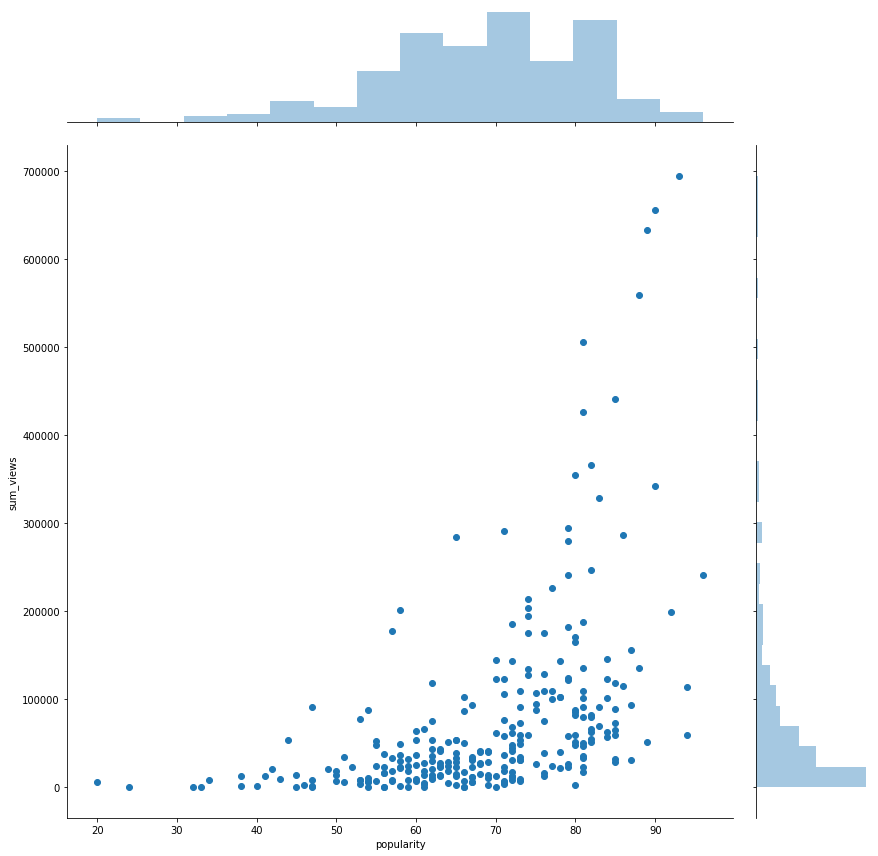

In [20]:
sns.jointplot(x="popularity", y="sum_views", data=artists_df, height=12)

In [21]:
display(artists_df.loc[artists_df['sum_views'] > 500000])

,name,candidate_songs,first_letter,popularity,avg_song_pop,max_song_pop,min_song_pop,genres,sum_views,avg_views,avg_old_chart,count_old_chart,avg_new_chart,count_new_chart
0,Coldplay,13,C,90,72.000000,85,54,"{'Post-Britpop': 2, 'Alternative rock': 11, 'B...",656640,50510.769231,8.545455,11,156.538462,5
1,Beyoncé,11,B,89,67.363636,79,59,"{'Pop ': 5, 'Contemporary R&B': 10, 'Hip hop '...",633229,57566.272727,15.428571,7,137.636364,5
2,Britney Spears,10,B,81,67.700000,79,58,"{'Pop ': 2, 'Dance-pop': 7, 'Teen pop': 5, 'Da...",506292,50629.200000,14.000000,6,165.000000,2
10,Lady Gaga,6,L,88,67.166667,79,31,"{'Electropop': 1, 'Dance-pop': 5, 'Synth-pop':...",559829,93304.833333,8.333333,3,159.833333,3
17,Eminem,5,E,93,75.200000,83,65,"{'Hip hop ': 2, 'Horrorcore': 1, 'Rap rock': 2...",694816,138963.200000,14.250000,4,86.600000,3


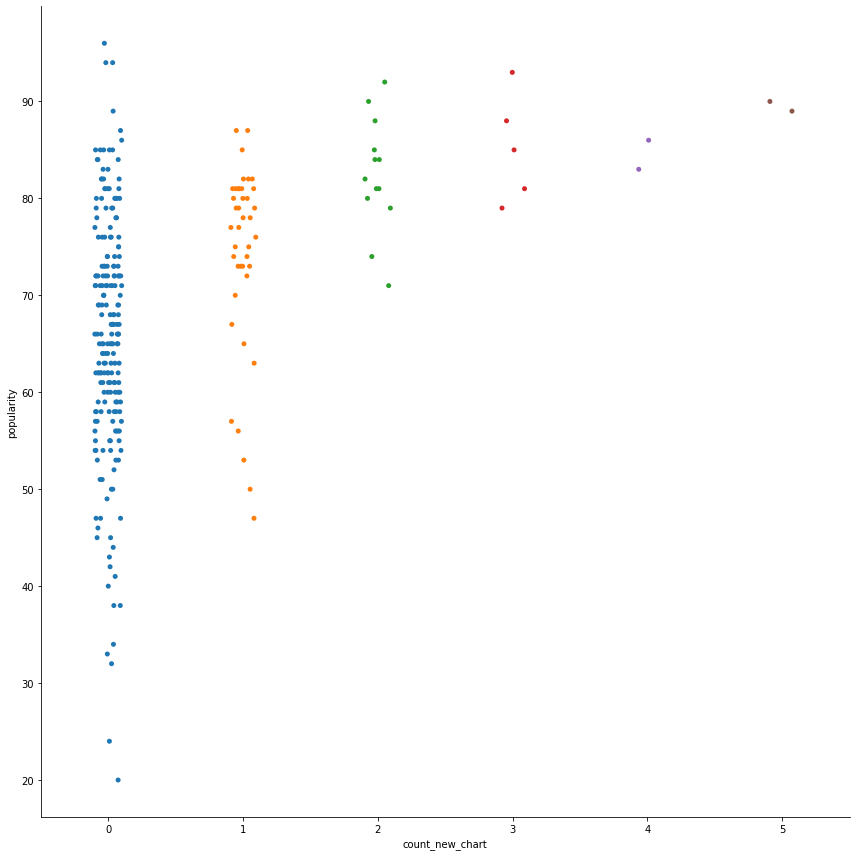

In [22]:
sns.catplot(x="count_new_chart", y="popularity", data=artists_df, height=12)

In [23]:
display(artists_df.loc[artists_df['popularity'] > 90].loc[artists_df['count_new_chart'] == 0])

,name,candidate_songs,first_letter,popularity,avg_song_pop,max_song_pop,min_song_pop,genres,sum_views,avg_views,avg_old_chart,count_old_chart,avg_new_chart,count_new_chart
8,Kanye West,6,K,96,74.5,82,64,"{'Hip hop ': 3, 'Electronica': 1, 'Pop ': 2, '...",240934,40155.666667,28.5,2,292.666667,0
112,Taylor Swift,1,T,94,75.0,75,75,{'Country pop': 1},114509,114509.000000,12.0,1,156.000000,0
149,Daddy Yankee,1,D,94,78.0,78,78,{'Reggaeton': 1},59729,59729.000000,NaN,0,199.000000,0


This graph shows some correlation between Spotify popularity and the number of songs an artist have entered the chart. There are some artists who are highly popular in Spotify, and have failed to enter songs to the chart. On the other hand, all of the artists who have entered many songs to the chart are popular on Spotify. Three of the artists actually has a spotify popularity rank of over 90, and still didn't manage to enter any songs to the chart. These three artists are Kanye West, Daddy Yankee and Taylor Swift.

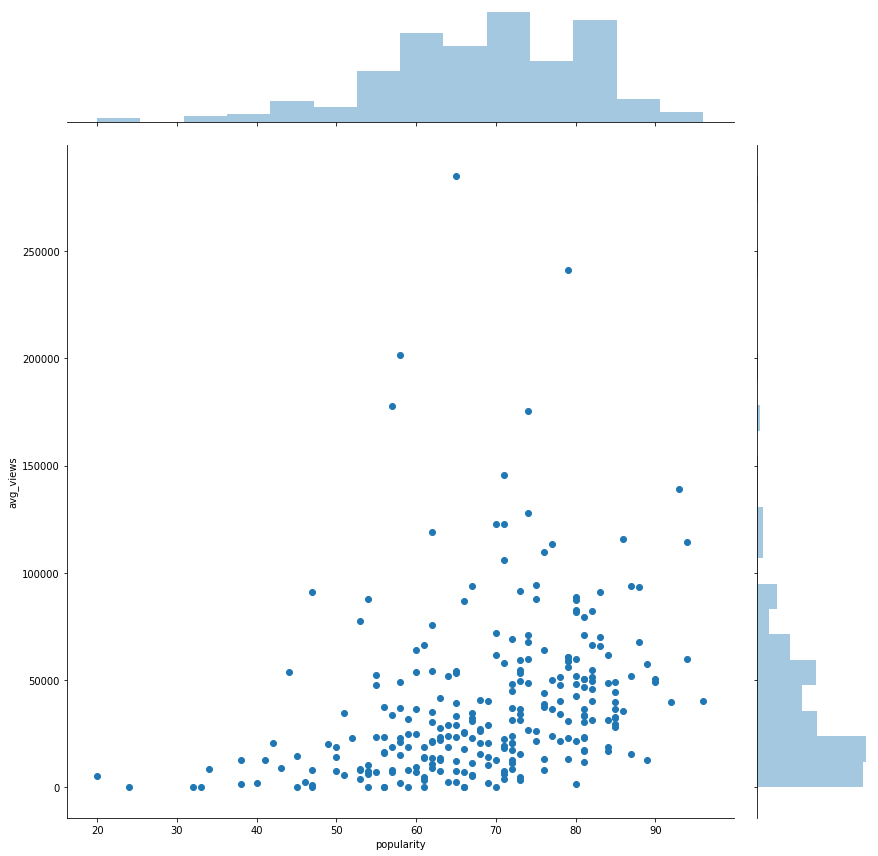

In [24]:
sns.jointplot(x="popularity", y="avg_views", data=artists_df, height=12)

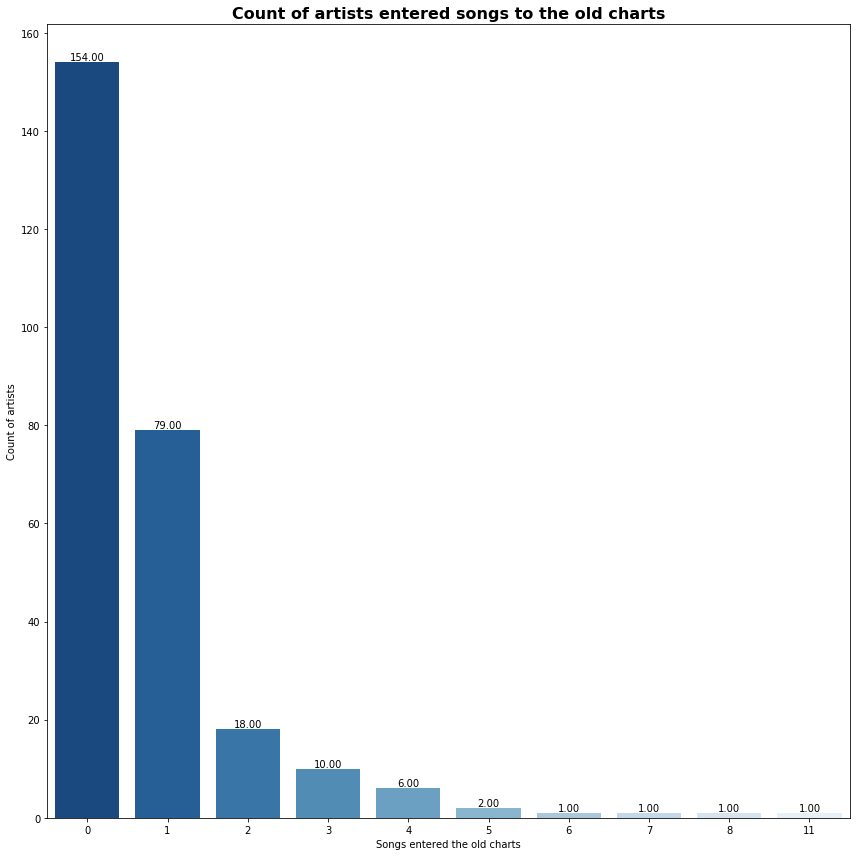

In [25]:
plt.figure(figsize=(12,12))
#sns.countplot()
ax = sns.countplot(x="count_old_chart", data=artists_df, palette ="Blues_r")
ax.set_title("Count of artists entered songs to the old charts", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel='Songs entered the old charts', ylabel='Count of artists')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.4,
            '{:1.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

In [26]:
display(artists_df.loc[artists_df['count_old_chart'] > 5])

,name,candidate_songs,first_letter,popularity,avg_song_pop,max_song_pop,min_song_pop,genres,sum_views,avg_views,avg_old_chart,count_old_chart,avg_new_chart,count_new_chart
0,Coldplay,13,C,90,72.000000,85,54,"{'Post-Britpop': 2, 'Alternative rock': 11, 'B...",656640,50510.769231,8.545455,11,156.538462,5
1,Beyoncé,11,B,89,67.363636,79,59,"{'Pop ': 5, 'Contemporary R&B': 10, 'Hip hop '...",633229,57566.272727,15.428571,7,137.636364,5
2,Britney Spears,10,B,81,67.700000,79,58,"{'Pop ': 2, 'Dance-pop': 7, 'Teen pop': 5, 'Da...",506292,50629.200000,14.000000,6,165.000000,2
3,The Black Eyed Peas,9,T,85,67.333333,78,55,"{'Dance-pop': 2, 'Pop ': 5, 'Funk ': 1, 'Hip h...",441125,49013.888889,12.250000,8,162.000000,3


Unlike the 90's chart, here there are more artists in the chart which have entered many songs to the yearly charts. The most popular ones are Coldplay with 11 out of their 13 songs and the Black Eyed Peas with eight of nine songs.

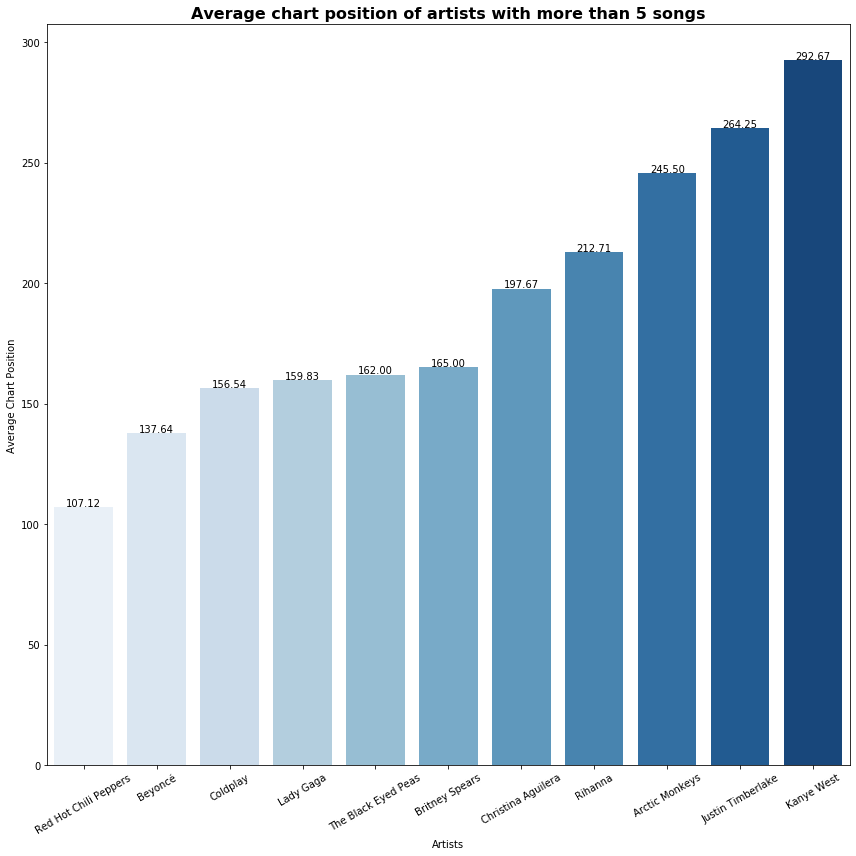

In [27]:
plt.figure(figsize=(12,12))
keys_df = artists_df.loc[artists_df['candidate_songs'] > 5].sort_values('avg_new_chart')
ax = sns.barplot(x=artists_df.loc[artists_df['candidate_songs'] > 5].name, y=artists_df.loc[artists_df['candidate_songs'] > 5].avg_new_chart, 
                 palette = "Blues", order = keys_df.name)
ax.set(xlabel="Artists", ylabel="Average Chart Position")
ax.set_title("Average chart position of artists with more than 5 songs", {'fontsize': 16,'fontweight' : 'bold'})
for item in ax.get_xticklabels(): item.set_rotation(30)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.4,
            '{:1.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

The most popular many-song artist is Amy Winehouse, followed by Green Day and Red Hot Chili Peppers. The last place is occupied by Kanye West.

## First Letter

In [94]:
first_letters = artists_df.groupby('first_letter')
fl_df = []
for group in first_letters:
    first_letter = {}
    first_letter['name'] = group[0]
    first_letter['count_artists'] = group[1]['name'].count()
    first_letter['sum_candidate_songs'] = group[1]['candidate_songs'].sum()
    first_letter['sum_popularity'] = group[1]['popularity'].sum()
    first_letter['avg_popularity'] = group[1]['popularity'].mean()
    first_letter['sum_views'] = group[1]['sum_views'].sum()
    first_letter['avg_views'] = group[1]['avg_views'].mean()
    first_letter['count_old_chart'] = group[1]['count_old_chart'].sum()
    first_letter['avg_new_chart'] = group[1]['avg_new_chart'].mean()
    first_letter['count_new_chart'] = group[1]['count_new_chart'].sum()
    first_letter['entrance_percentage'] = first_letter['count_new_chart'] / first_letter['sum_candidate_songs']
    fl_df.append(first_letter)
fl_df = pd.DataFrame(fl_df)
print(fl_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 11 columns):
name                   27 non-null object
count_artists          27 non-null int64
sum_candidate_songs    27 non-null int64
sum_popularity         27 non-null int64
avg_popularity         27 non-null float64
sum_views              27 non-null int64
avg_views              27 non-null float64
count_old_chart        27 non-null int64
avg_new_chart          27 non-null float64
count_new_chart        27 non-null int64
entrance_percentage    27 non-null float64
dtypes: float64(4), int64(6), object(1)
memory usage: 2.3+ KB
None


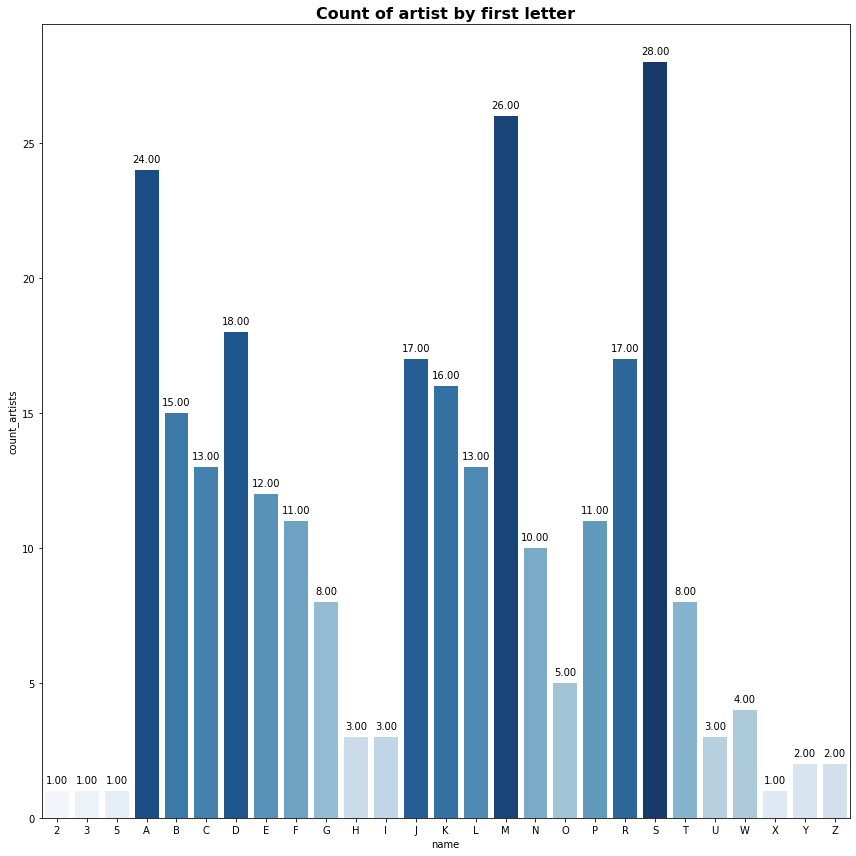

In [95]:
plt.figure(figsize=(12,12))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.count_artists.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.count_artists, order = fl_df.name, palette = np.array(pal[::-1])[rank])
ax.set_title("Count of artist by first letter", {'fontsize': 16,'fontweight' : 'bold'})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

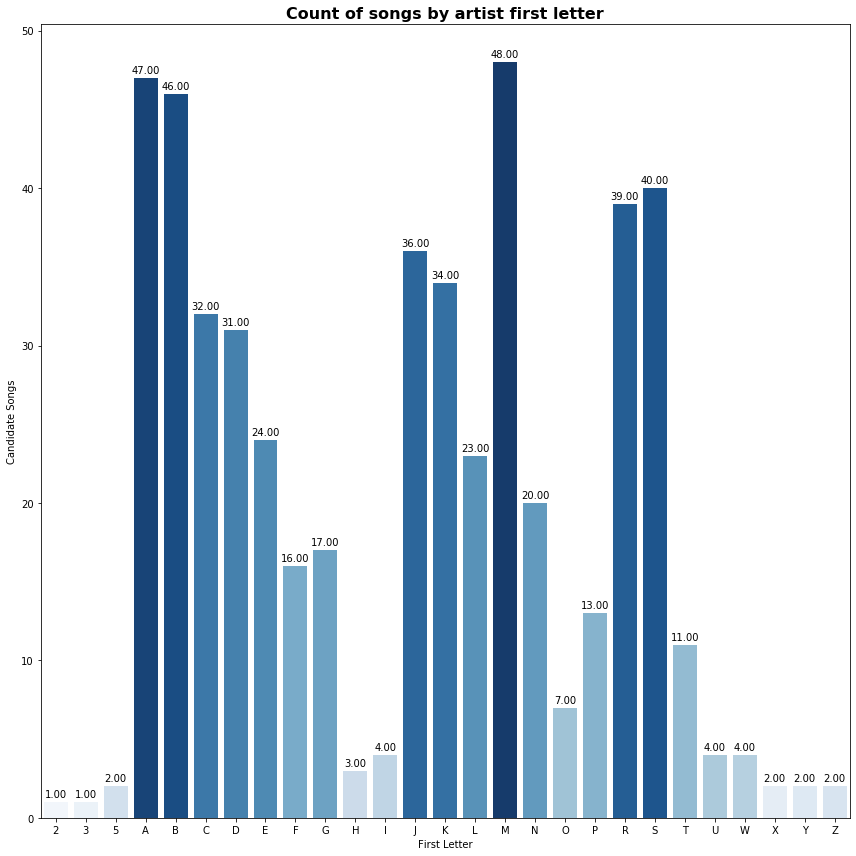

In [96]:
plt.figure(figsize=(12,12))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.sum_candidate_songs.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.sum_candidate_songs, palette = np.array(pal[::-1])[rank])
ax.set_title("Count of songs by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Candidate Songs')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

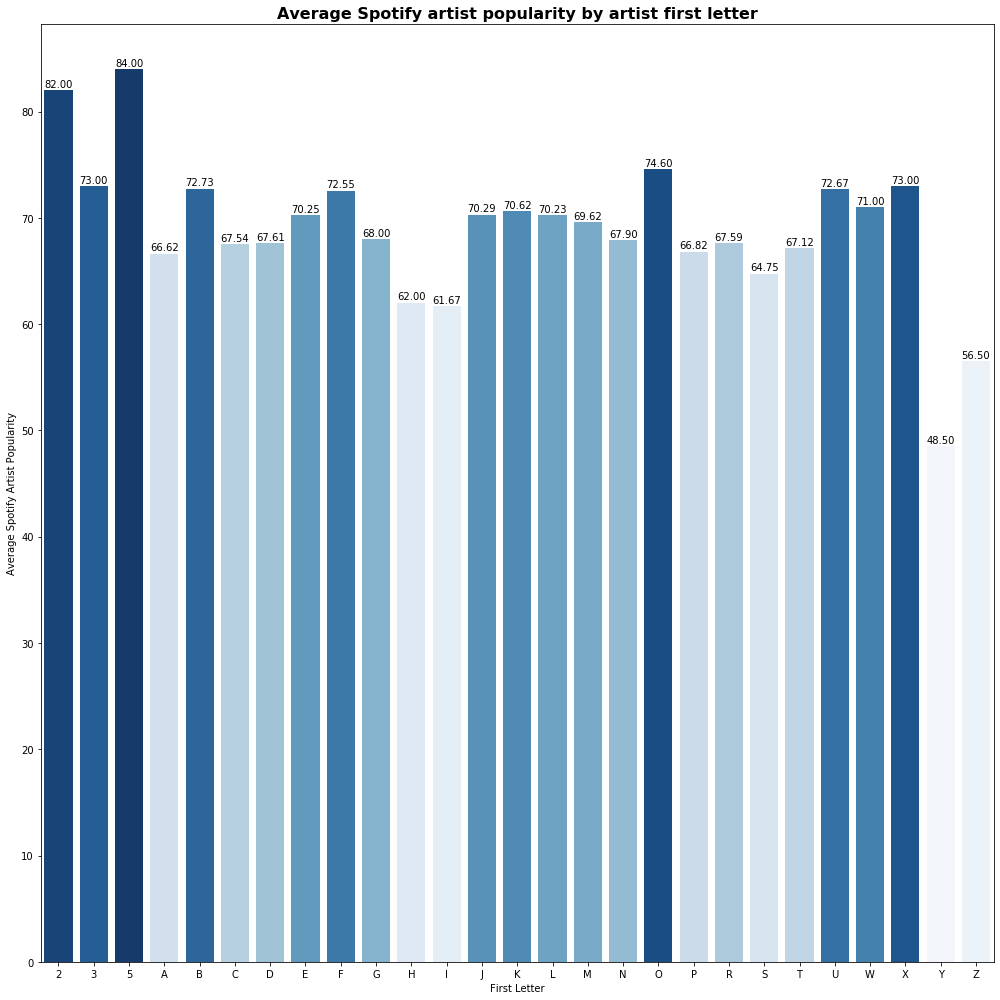

In [97]:
plt.figure(figsize=(14,14))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.avg_popularity.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.avg_popularity, palette = np.array(pal[::-1])[rank])
ax.set_title("Average Spotify artist popularity by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Average Spotify Artist Popularity')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

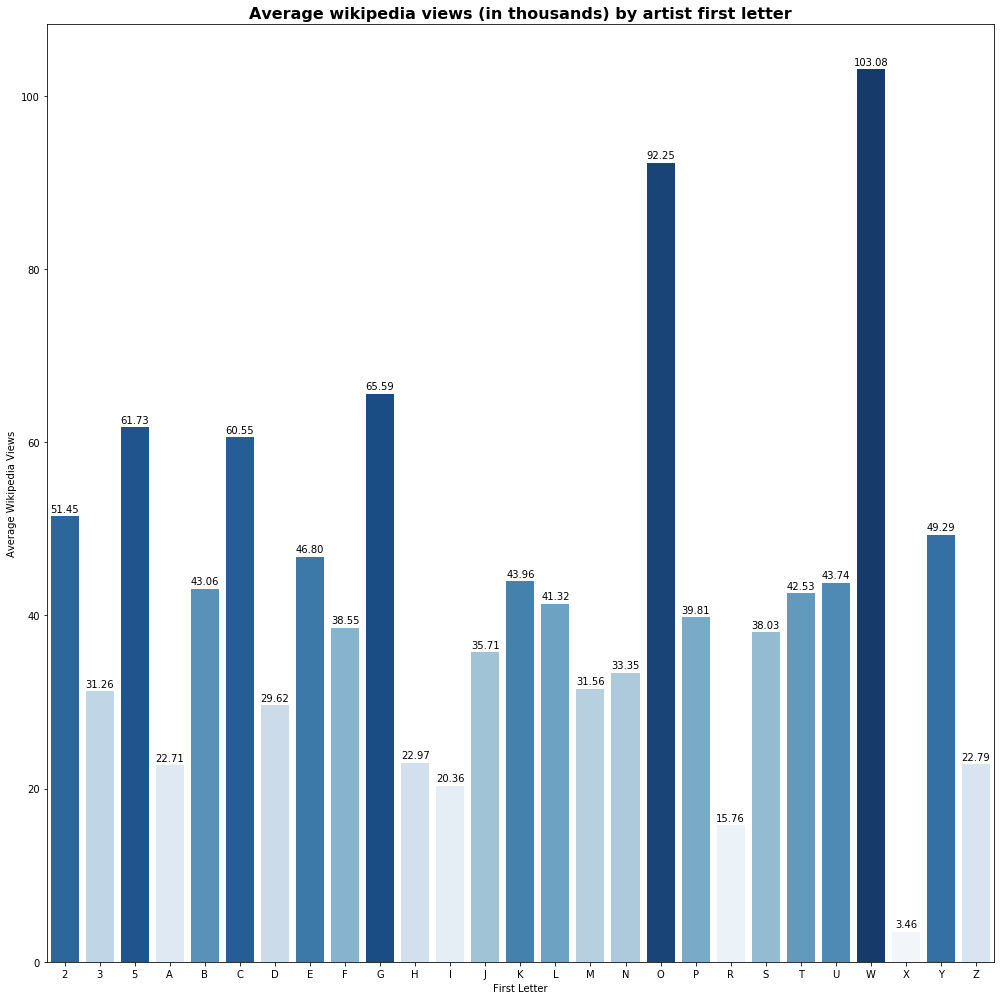

In [98]:
plt.figure(figsize=(14,14))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.avg_views.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.avg_views/1000, palette = np.array(pal[::-1])[rank])
ax.set_title("Average wikipedia views (in thousands) by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Average Wikipedia Views')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.5,
            '{:.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

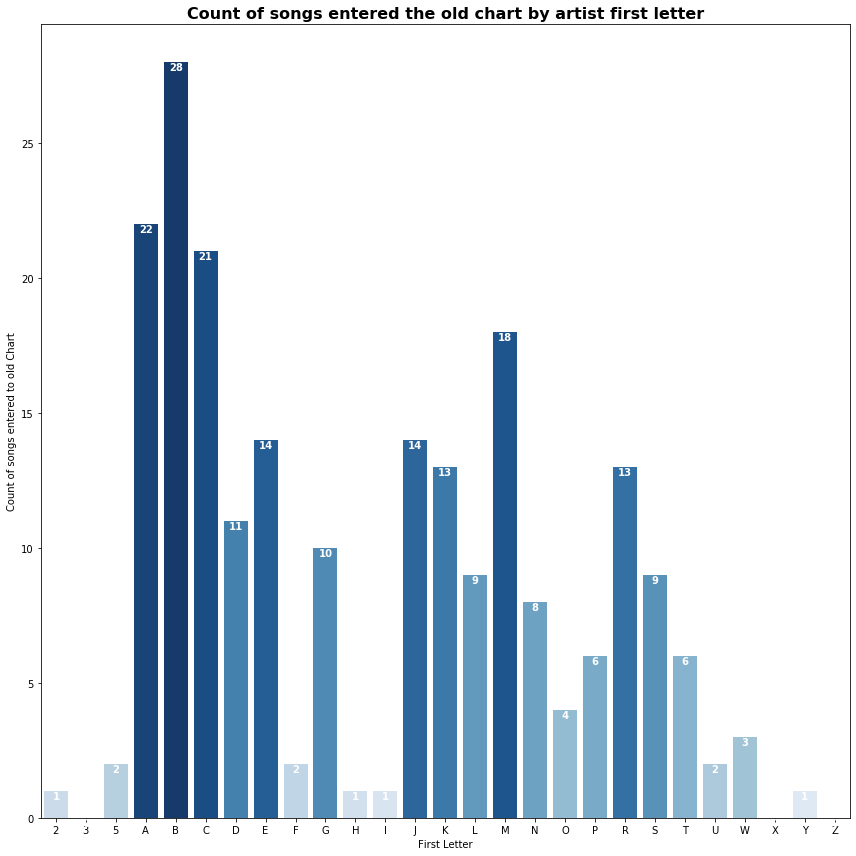

In [99]:
plt.figure(figsize=(12,12))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.count_old_chart.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.count_old_chart, palette = np.array(pal[::-1])[rank])
ax.set(xlabel="First Letter", ylabel='Count of songs entered to old Chart')
ax.set_title("Count of songs entered the old chart by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
#for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(fl_df.count_old_chart):
    ax.text(i ,v, "{:,}".format(v), va ='top', ha= "center", color="white", weight="bold")
plt.tight_layout()
plt.show()

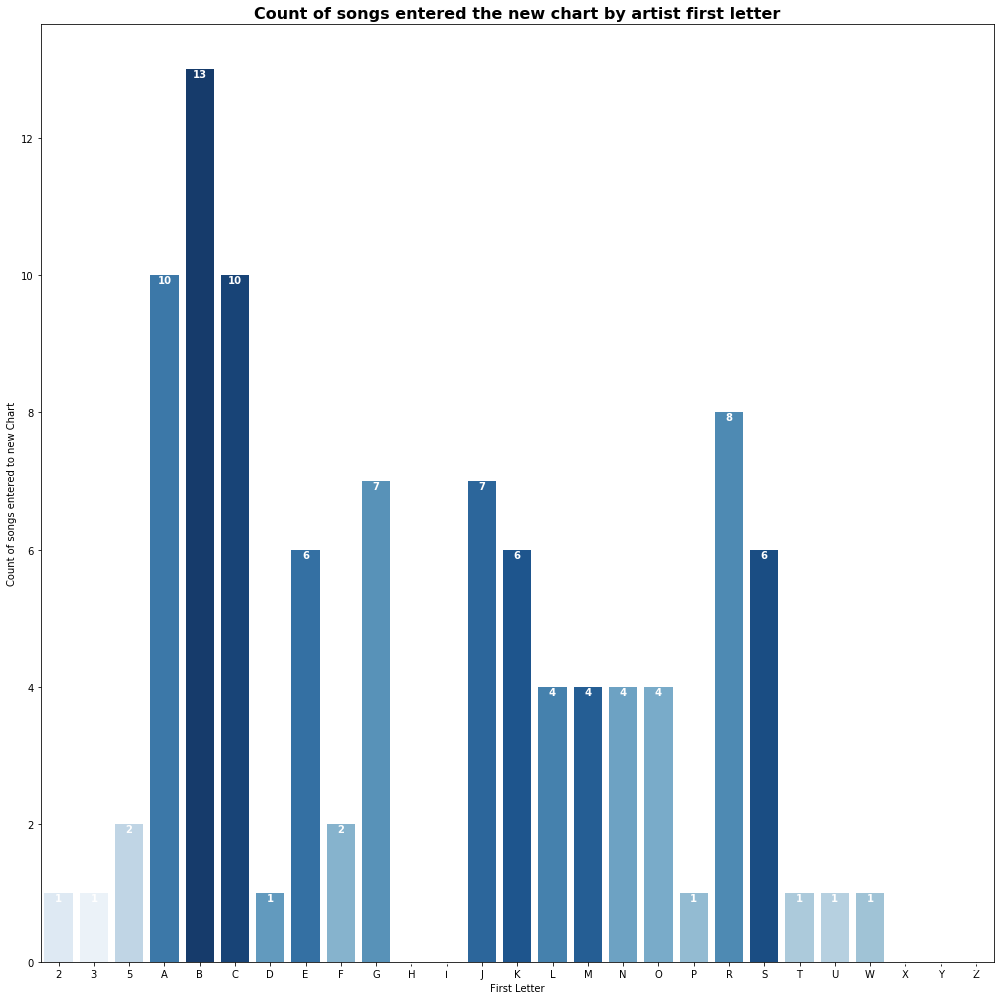

In [100]:
plt.figure(figsize=(14,14))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.sum_views.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.count_new_chart, palette = np.array(pal[::-1])[rank])
ax.set_title("Count of songs entered the new chart by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Count of songs entered to new Chart')
#for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(fl_df.count_new_chart):
    ax.text(i ,v, "{:,}".format(v), va ='top', ha= "center", color="white", weight="bold")
plt.tight_layout()
plt.show()

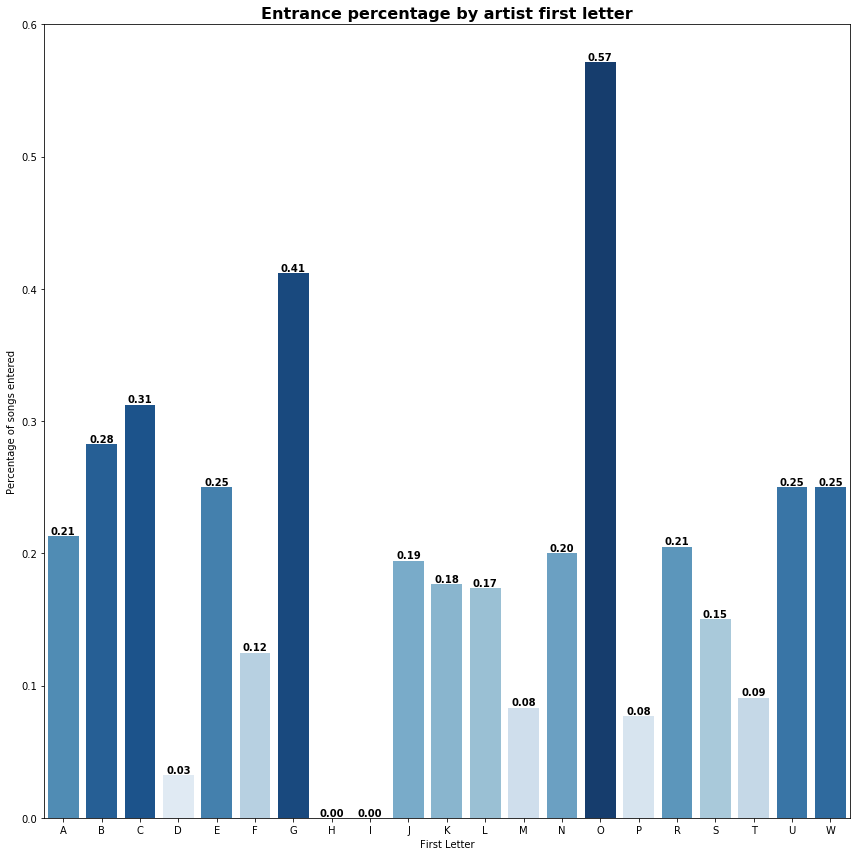

In [101]:
fl_percentage = fl_df.loc[fl_df['sum_candidate_songs'] >= 3]
plt.figure(figsize=(12,12))
pal = sns.color_palette("Blues_r", len(fl_percentage.name))
rank = fl_percentage.entrance_percentage.argsort().argsort()
ax = sns.barplot(x=fl_percentage.name, y=fl_percentage.entrance_percentage, palette = np.array(pal[::-1])[rank])
ax.set_title("Entrance percentage by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Percentage of songs entered')
#for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(fl_percentage.entrance_percentage):
    ax.text(i ,v, "{:,.2f}".format(v), va ='bottom', ha= "center", weight="bold")
plt.tight_layout()
plt.show()

As a somewhat contrary trend to the one we saw on previous charts, here there doesn't seem to be any tilt towards the earlier letters in the ABC. The most popular letter by a big gap is 'O'. There are only seven songs coming from artists that start with 'O', four of them have entered the Top 100.

## Year

In [103]:
grouped_by_year = thousands_df.groupby('year')
year_df = []
for group in grouped_by_year:
    year = {}
    year['name'] = group[0]
    year['count_candidates'] = group[1]['name'].count()
    year['count_entrances'] = group[1].loc[group[1]['new_chart_location'] <= 100]['name'].count()
    year['entrance_percentage'] = year['count_entrances']/year['count_candidates']
    year['avg_song_pop'] = group[1]['song_popularity'].mean()
    year['avg_views'] = group[1]['views'].mean()
    year['avg_chart_location'] = group[1].loc[group[1]['new_chart_location'] > 0]['new_chart_location'].mean()
    year['avg_valence'] = group[1]['valence'].mean()
    genres = {}
    for song in group[1]['genres']:
        for song_genre in song.split(","):
            if len(re.findall(r"'([^']*)'", song_genre))>0:
                if re.findall(r"'([^']*)'", song_genre)[0] not in genres.keys():
                    genres[re.findall(r"'([^']*)'", song_genre)[0]] = 1
                else:
                    genres[re.findall(r"'([^']*)'", song_genre)[0]] += 1
    year['popular_genre'] = max(genres.items(), key=operator.itemgetter(1))[0]
    year_df.append(year)
year_df= pd.DataFrame(year_df)
display(year_df)

,name,count_candidates,count_entrances,entrance_percentage,avg_song_pop,avg_views,avg_chart_location,avg_valence,popular_genre
0,2000,80,12,0.150000,63.250000,40280.612500,246.337500,0.588730,Alternative rock
1,2001,47,6,0.127660,64.957447,42926.574468,269.021277,0.605489,Contemporary R&B
2,2002,40,10,0.250000,61.550000,41404.075000,219.750000,0.490575,Alternative rock
3,2003,41,11,0.268293,66.512195,50220.585366,257.097561,0.536473,Contemporary R&B
4,2004,41,12,0.292683,63.756098,53270.146341,232.926829,0.552173,Pop rock
5,2005,54,9,0.166667,66.148148,36380.259259,281.074074,0.537143,Alternative rock
6,2006,52,8,0.153846,66.653846,41633.115385,278.769231,0.481981,Contemporary R&B
7,2007,58,5,0.086207,61.913793,33852.896552,288.172414,0.561310,Pop
8,2008,49,12,0.244898,67.551020,41133.489796,240.448980,0.466020,Pop
9,2009,47,15,0.319149,65.000000,45833.042553,221.127660,0.534566,Contemporary R&B


Unlike the similar table in the original chart, here the year seperation seems more balanced, with no clear trend whatsoever. There are LOTS of candidate songs from 2000, perhaps because there are many songs released in the late 90's that entered this chart, tagged as if they were released in 2000. The most popular year both in absolute numbers and percentage is 2009. This is the same year which was the least represented in the original chart.

## Year Source

In [105]:
year_source = thousands_df.groupby('year_source')
source_df = []
for group in year_source:
    source = {}
    source['name'] = group[0]
    source['count_songs'] = group[1]['name'].count()
    source['avg_song_popularity'] = group[1]['song_popularity'].mean()
    source['avg_views'] = group[1]['views'].mean()
    source['count_old_chart'] = group[1]['old_chart_position'].loc[group[1]['old_chart_position'] > 0].count()
    source['count_new_chart'] = group[1]['new_chart_location'].loc[group[1]['new_chart_location'] <= 100].count()
    source['entrance_percentage'] = source['count_new_chart']/source['count_songs']
    source['avg_new_chart'] = group[1]['new_chart_location'].mean()
    source_df.append(source)
source_df = pd.DataFrame(source_df)
display(source_df)

,name,count_songs,avg_song_popularity,avg_views,count_old_chart,count_new_chart,entrance_percentage,avg_new_chart
0,manual,20,57.50000,31214.050000,4,2,0.100000,270.100000
1,spotify,50,60.78000,61403.160000,18,6,0.120000,274.480000
2,wikipedia,439,65.42369,40335.899772,197,92,0.209567,252.093394


## Entered Chart

In [108]:
thousands_df["entered_chart"] = thousands_df["new_chart_location"] < 101
entered_chart = thousands_df.groupby('entered_chart')
entered_df = []
for group in entered_chart:
    bol = {}
    bol['name'] = group[0]
    bol['avg_song_popularity'] = group[1]['song_popularity'].mean()
    bol['avg_artist_popularity'] = group[1]['artist_popularity'].mean()
    bol['avg_duration'] = group[1]['duration_ms'].mean()
    bol['avg_key'] = group[1]['key'].mean()
    bol['avg_time_signature'] = group[1]['time_signature'].mean()
    bol['avg_acousticness'] = group[1]['acousticness'].mean()
    bol['avg_danceability'] = group[1]['danceability'].mean()
    bol['avg_energy'] = group[1]['energy'].mean()
    bol['avg_instrumentalness'] = group[1]['instrumentalness'].mean()
    bol['avg_loudness'] = group[1]['loudness'].mean()
    bol['avg_speechiness'] = group[1]['speechiness'].mean()
    bol['avg_valence'] = group[1]['valence'].mean()
    bol['avg_tempo'] = group[1]['tempo'].mean()
    bol['avg_views'] = group[1]['views'].mean()
    bol['avg_year'] = group[1]['year'].mean()
    bol['count_old_position'] = group[1]['old_chart_position'].loc[group[1]['old_chart_position'] > 0].count()
    entered_df.append(bol)
entered_df = pd.DataFrame(entered_df)
display(entered_df)

,name,avg_song_popularity,avg_artist_popularity,avg_duration,avg_key,avg_time_signature,avg_acousticness,avg_danceability,avg_energy,avg_instrumentalness,avg_loudness,avg_speechiness,avg_valence,avg_tempo,avg_views,avg_year,count_old_position
0,False,62.501222,72.557457,241079.682152,5.166259,3.97555,0.147797,0.635753,0.730328,0.044626,-5.997934,0.081084,0.550888,118.641621,31705.210269,2004.281174,152
1,True,73.470000,81.210000,242482.390000,5.220000,3.98000,0.155342,0.586980,0.712210,0.005288,-5.369750,0.075113,0.490849,118.003340,84344.680000,2004.660000,67


The songs entering the chart are a lot more popular on Spotify, way less instrumental, less happy, and have a lot more views than the songs who didnt enter the chart.

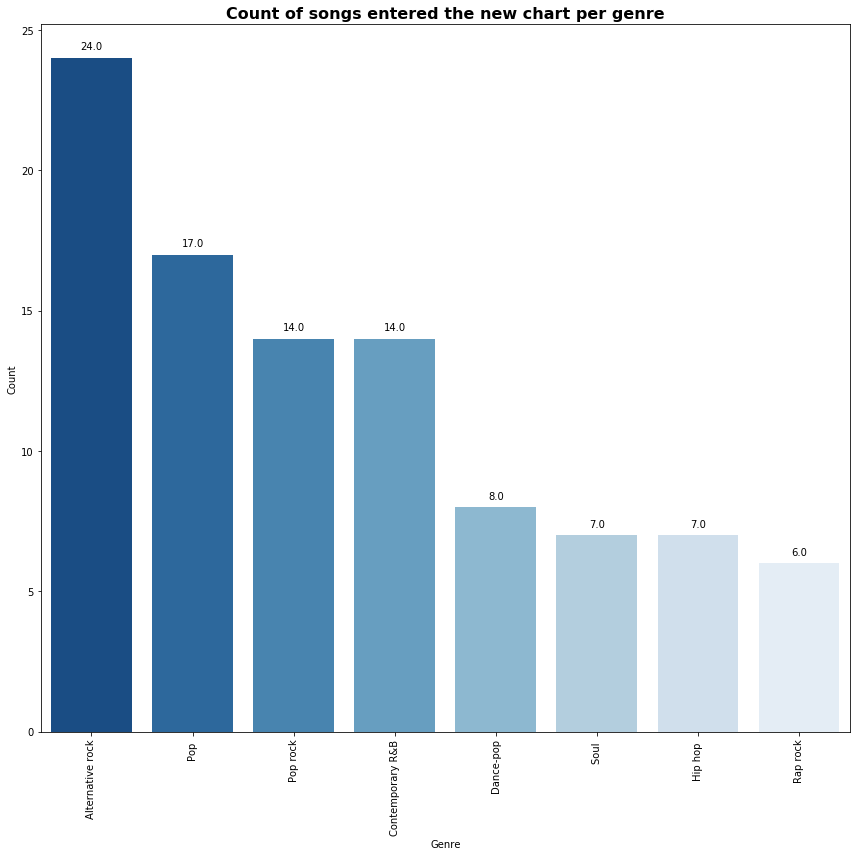

In [109]:
entered_songs = thousands_df.loc[thousands_df['entered_chart'] == True]
genres_dict = {}
for song_genre in entered_songs['genres']:
    for genre in song_genre.split(","):
        if len(re.findall(r"'([^']*)'", genre))>0:
            if re.findall(r"'([^']*)'", genre)[0] in genres_dict.keys():
                genres_dict[re.findall(r"'([^']*)'", genre)[0]] = genres_dict[re.findall(r"'([^']*)'", genre)[0]] + 1
            else:
                genres_dict[re.findall(r"'([^']*)'", genre)[0]] = 1
newDict = dict(filter(lambda elem: elem[1] > 5,genres_dict.items()))
order_key = sorted(newDict.items(), key=operator.itemgetter(1), reverse = True)
keys = []
for key in order_key:
    keys.append(key[0])
plt.figure(figsize=(12,12))
ax = sns.barplot(x=list(newDict.keys()), y=np.array(list(newDict.values())).astype(float), order = keys,
                palette = "Blues_r")
ax.set_title("Count of songs entered the new chart per genre", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="Genre", ylabel='Count')
for item in ax.get_xticklabels(): item.set_rotation(90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:,}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

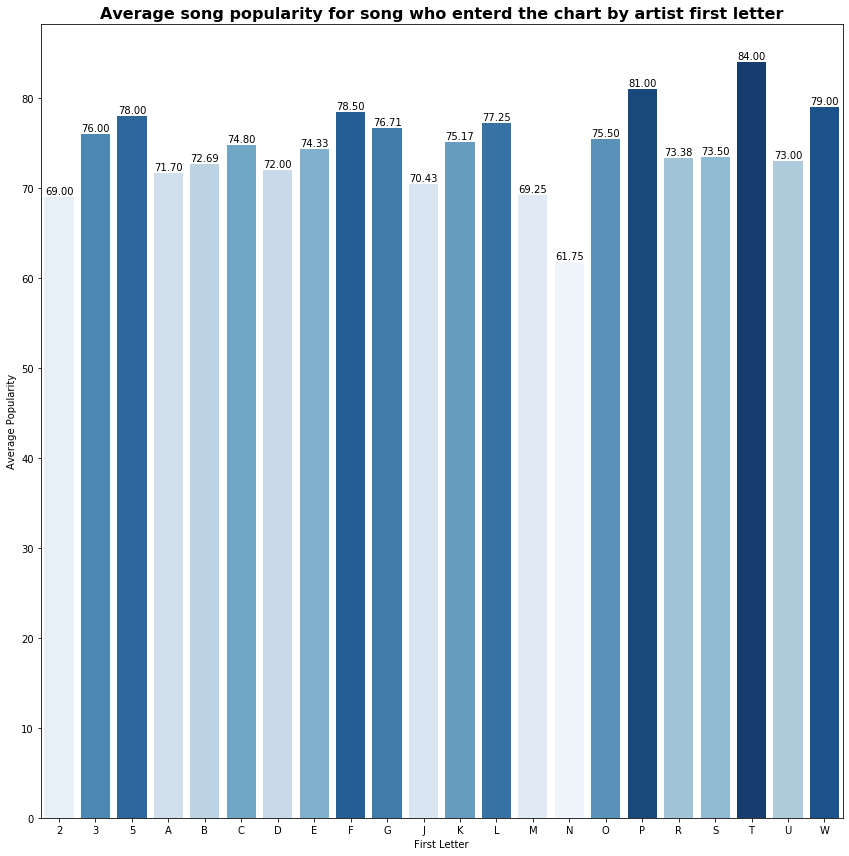

In [110]:
entered_first_letter = entered_songs.groupby('artist_first_letter')
entered_fl_df = []
for group in entered_first_letter:
    entered_fl = {}
    entered_fl['name'] = group[0]
    entered_fl['avg_song_popularity'] = group[1]['song_popularity'].mean()
    entered_fl['avg_chart_location'] = group[1]['new_chart_location'].mean()
    entered_fl_df.append(entered_fl)
entered_fl_df = pd.DataFrame(entered_fl_df)
plt.figure(figsize=(12,12))
pal = sns.color_palette("Blues_r", len(entered_fl_df.name))
rank = entered_fl_df.avg_song_popularity.argsort().argsort()
ax = sns.barplot(x=entered_fl_df.name, y=entered_fl_df.avg_song_popularity, palette = np.array(pal[::-1])[rank])
ax.set(xlabel="First Letter", ylabel='Average Popularity')
ax.set_title("Average song popularity for song who enterd the chart by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:,.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

In [111]:
count_first_songs = 0
popularity_first_rate = 0
location_first_rate = 0
count_last_songs = 0
popularity_last_rate = 0
location_last_rate = 0
for fl in entered_first_letter:
    if fl[0] in ['1', 'A', 'B']:
        count_first_songs = count_first_songs + fl[1]['name'].count()
        popularity_first_rate = popularity_first_rate + fl[1]['song_popularity'].sum()
        location_first_rate = location_first_rate + fl[1]['new_chart_location'].sum()
    else:
        count_last_songs = count_last_songs + fl[1]['name'].count()
        popularity_last_rate = popularity_last_rate + fl[1]['song_popularity'].sum()
        location_last_rate = location_last_rate + fl[1]['new_chart_location'].sum()
comparing_letters = pd.DataFrame({'Name': ['First Letters', 'Rest of the Letters'], 'Count': [count_first_songs, count_last_songs], 'Popularity': [popularity_first_rate, popularity_last_rate],
                                 'Avg_Popularity': [popularity_first_rate/count_first_songs, popularity_last_rate/count_last_songs],
                                 'Avg_Location': [location_first_rate/count_first_songs, location_last_rate/count_last_songs]})
display(comparing_letters)

,Name,Count,Popularity,Avg_Popularity,Avg_Location
0,First Letters,23,1662,72.260870,34.304348
1,Rest of the Letters,77,5685,73.831169,55.337662


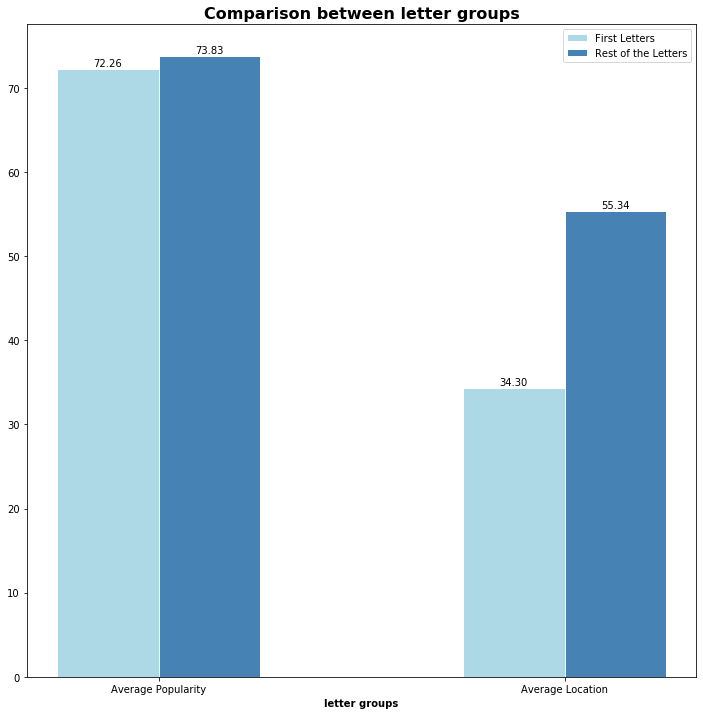

In [113]:
df_for_graph = pd.DataFrame({
    'First Letters': [popularity_first_rate/count_first_songs, location_first_rate/count_first_songs],
    'Rest': [popularity_last_rate/count_last_songs, location_last_rate/count_last_songs]
})

barWidth = 0.25
 
# set height of bar
bars1 = df_for_graph['First Letters']
bars2 = df_for_graph['Rest']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

fig, ax = plt.subplots(figsize=(12,12))
ax.set_title("Comparison between letter groups", {'fontsize': 16,'fontweight' : 'bold'})

# Make the plot
plt.bar(r1, bars1, color='lightblue', width=barWidth, edgecolor='white', label='First Letters')
plt.bar(r2, bars2, color='steelblue', width=barWidth, edgecolor='white', label='Rest of the Letters')

# Add xticks on the middle of the group bars
plt.xlabel('letter groups', fontweight='bold')
plt.xticks([r + (barWidth / 2) for r in range(len(bars1))], ['Average Popularity', 'Average Location'])

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:,.2f}'.format(p.get_height()),
            ha="center")

# Create legend & Show graphic
plt.legend()
plt.show()

As we saw some indications to before, there is no preferability to songs coming from the first letters when it comes to their average Spotify popularity. We can say though that there is a significant difference between the average location of songs entering the chart from the first letter, and the other songs.

## Trend Analysis

In [116]:
drop = []
for new_song in thousands_df.iterrows():
    if new_song[1]['original_decade_position'] > 0:
        drop.append(new_song[1]['new_chart_location'] - new_song[1]['original_decade_position'])
    else:
        drop.append(-1000)
thousands_df['position_drop'] = drop
display(thousands_df.sort_values(by=['position_drop'], ascending=False).head(1))

,name,version_exists,artist,artist_first_letter,year,year_source,song_popularity,artist_popularity,duration_ms,key,...,speechiness,valence,tempo,genres,views,old_chart_position,new_chart_location,original_decade_position,entered_chart,position_drop
461,thousands_All In My Head,1,Kosheen,K,2003,wikipedia,37,46,244893,6,...,0.0284,0.326,117.022,"['Alternative rock', 'Alternative dance']",2277,0,462,89,False,373


The song which dropped most places between the two decade charts is "In My Head" by Kosheen - falling from 89 to 462 - a drop of 373 places!

In [121]:
display(thousands_df.loc[thousands_df['position_drop'] > -1000].sort_values(by=['position_drop']).head(1))

,name,version_exists,artist,artist_first_letter,year,year_source,song_popularity,artist_popularity,duration_ms,key,...,speechiness,valence,tempo,genres,views,old_chart_position,new_chart_location,original_decade_position,entered_chart,position_drop
15,thousands_Toxic,0,Britney Spears,B,2004,wikipedia,79,81,198800,5,...,0.114,0.924,143.04,['Dance '],123715,7,16,83,True,-67


The song with the highest rise is Toxic by Britney Spears rising from 83 to 16 - a 67 positions rise.

In [122]:
def set_trend(x):
    if x > 0:
        return "down"
    if x == 0:
        return "no change"
    if x < 0 and x > -1000:
        return "up"
    else:
        return "new"

thousands_df["trend"] = thousands_df["position_drop"].apply(set_trend)
thousands_trend = thousands_df.groupby('trend')
trend_df = []
for group in thousands_trend:
    bol = {}
    bol['name'] = group[0]
    bol['count'] = group[1]['name'].count()
    bol['avg_song_popularity'] = group[1]['song_popularity'].mean()
    bol['avg_artist_popularity'] = group[1]['artist_popularity'].mean()
    bol['avg_acousticness'] = group[1]['acousticness'].mean()
    bol['avg_danceability'] = group[1]['danceability'].mean()
    bol['avg_energy'] = group[1]['energy'].mean()
    bol['avg_valence'] = group[1]['valence'].mean()
    bol['avg_tempo'] = group[1]['tempo'].mean()
    bol['avg_views'] = group[1]['views'].mean()
    trend_df.append(bol)
trend_df = pd.DataFrame(trend_df)
display(trend_df)

,name,count,avg_song_popularity,avg_artist_popularity,avg_acousticness,avg_danceability,avg_energy,avg_valence,avg_tempo,avg_views
0,down,70,69.142857,75.514286,0.250988,0.544043,0.636500,0.386239,119.433671,53199.285714
1,new,408,63.186275,73.448529,0.130768,0.642831,0.744164,0.567459,118.703554,35773.453431
2,no change,2,77.500000,85.500000,0.047059,0.475000,0.769000,0.476500,137.007000,102826.000000
3,up,29,73.620690,81.827586,0.171271,0.600448,0.697000,0.513279,112.390897,99197.517241
